In [1]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'ALL_10') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++


# Classification

In [4]:
METHOD_LIST = ['RF','XGB', 'LGBM', 'ExtraTrees','SVM', 'LR', 'MLNN', 'RVM', 'DNN', 'CNN'] #, 'NaiveBayes','MLNN', 'XGB'] # 
Runs = []
nruns = 1
SCALER = "standard" # minmax, standard, normaliser
GROUPING = "mean"
FEAT_SELECTOR = "low_variance" # "low_variance" None
SELECTOR_METHOD = "FDR" # mannwhitney, FDR
SELECTOR_ALPHA = 0.05 # see this as the maximum p-value to classify 
DIM_TYPE =  None #"PCA" #"LDA", "PCA", "PLS" 
DIM_NUM = 1000
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
Rocket.DATA_merged_processed = None
PREPROC_DICT = {"patient_grouping": GROUPING, "bias_removal": False, "noise": True}
FSELECT_DICT = {"type": FEAT_SELECTOR, "pvalue": SELECTOR_ALPHA, "method": SELECTOR_METHOD}
DIMRED_DICT = {"type": DIM_TYPE, "n_comp": DIM_NUM}

In [5]:
Rocket.X_GENOME = None
Rocket.Y_CLASS = None
Rocket.PREP_HASH = None

RUNS, MODELS, ACC = Rocket.run_classification(method_list = METHOD_LIST, 
                          num_run = nruns,
                          pipeline = {"scaler": {"type": SCALER},
                                      "pre_processing": PREPROC_DICT,
                                      "feature_selection": FSELECT_DICT, # mannwhitney         
                                      "dim_reduction": DIMRED_DICT},
                          parameters = {}, 
                          features = 'genomic')

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Prepping data, this may take a while..
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Grouping probesets
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Selecting features using a low_variance filter
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Kept 230 of 54613 features using FDR with p = 0.05
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 230) and class vector (58,)
MODEL: RF accuracy:  0.8103448275862071 +/-: 0.02176341296436421
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing featu

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

MODEL: XGB accuracy:  0.7241379310344827 +/-: 0.03244243865528051
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 230) and class vector (58,)


/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored

MODEL: LGBM accuracy:  0.8103448275862067 +/-: 0.01653875256729002
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 230) and class vector (58,)
MODEL: ET accuracy:  0.793103448275862 +/-: 0.03700050444996938
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (58, 230) and class vector (58,)
MODEL: SVM accuracy:  0.8275862068965517 +/-: 0.014683097322811953
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASS

/home/bramiozo/DEV/GIT/RexR/rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))



  42 - L= 1.8013935 - Gamma=31.2527516 (M=  32) - s=0.0100
  43 - L= 1.8125567 - Gamma=31.2552713 (M=  32) - s=0.0100
  44 - L= 1.8229514 - Gamma=31.2561623 (M=  32) - s=0.0100
  45 - L= 1.8320160 - Gamma=31.2682677 (M=  32) - s=0.0100
  46 - L= 1.8389406 - Gamma=31.8630569 (M=  33) - s=0.0100
  47 - L= 1.8446765 - Gamma=31.8544958 (M=  33) - s=0.0100
  48 - L= 1.8502033 - Gamma=31.8726044 (M=  33) - s=0.0100
  49 - L= 1.8553945 - Gamma=31.8768507 (M=  33) - s=0.0100
  50 - L= 1.8602539 - Gamma=31.8674155 (M=  33) - s=0.0100
  51 - L= 1.8648532 - Gamma=31.8708066 (M=  33) - s=0.0100
  52 - L= 1.8688645 - Gamma=31.8666367 (M=  33) - s=0.0100
  53 - L= 1.8719845 - Gamma=32.3360421 (M=  34) - s=0.0100
  54 - L= 1.8752764 - Gamma=32.3375245 (M=  34) - s=0.0100
  55 - L= 1.8776316 - Gamma=32.3560868 (M=  34) - s=0.0100
  56 - L= 1.8797426 - Gamma=32.1601446 (M=  34) - s=0.0100
  57 - L= 1.8811825 - Gamma=32.1597469 (M=  34) - s=0.0100
  58 - L= 1.8823534 - Gamma=32.1619775 (M=  34) - s=0.0

  71 - L= 1.6718869 - Gamma=35.0311236 (M=  38) - s=0.0100
  72 - L= 1.6719274 - Gamma=35.0356351 (M=  38) - s=0.0100
  73 - L= 1.6719657 - Gamma=35.0368473 (M=  38) - s=0.0100
  74 - L= 1.6720008 - Gamma=35.0898395 (M=  38) - s=0.0100
  75 - L= 1.6720297 - Gamma=35.0884900 (M=  38) - s=0.0100
  76 - L= 1.6720564 - Gamma=35.0958099 (M=  38) - s=0.0100
  77 - L= 1.6720843 - Gamma=35.0968780 (M=  38) - s=0.0100
  78 - L= 1.6721082 - Gamma=35.0970019 (M=  38) - s=0.0100
  79 - L= 1.6721285 - Gamma=35.0964801 (M=  38) - s=0.0100
  80 - L= 1.6721470 - Gamma=35.0964033 (M=  38) - s=0.0100
  81 - L= 1.6721588 - Gamma=35.0966728 (M=  38) - s=0.0100
  82 - L= 1.6721689 - Gamma=35.0968007 (M=  38) - s=0.0100
  83 - L= 1.6721769 - Gamma=35.0958859 (M=  38) - s=0.0100
  84 - L= 1.6721823 - Gamma=35.0957850 (M=  38) - s=0.0100
  85 - L= 1.6721873 - Gamma=35.0955064 (M=  38) - s=0.0100
  86 - L= 1.6721913 - Gamma=35.1128005 (M=  38) - s=0.0100
  87 - L= 1.6721940 - Gamma=35.1128053 (M=  38) - s=0.01

  83 - L= 2.0108876 - Gamma=33.0125858 (M=  37) - s=0.0100
  84 - L= 2.0109020 - Gamma=33.0019551 (M=  37) - s=0.0100
  85 - L= 2.0109108 - Gamma=33.0042926 (M=  37) - s=0.0100
  86 - L= 2.0109182 - Gamma=32.9954702 (M=  37) - s=0.0100
  87 - L= 2.0109241 - Gamma=32.9868513 (M=  37) - s=0.0100
  88 - L= 2.0109315 - Gamma=32.9925065 (M=  37) - s=0.0100
  89 - L= 2.0109400 - Gamma=33.0262917 (M=  37) - s=0.0100
  90 - L= 2.0109477 - Gamma=33.0270901 (M=  37) - s=0.0100
  91 - L= 2.0109549 - Gamma=33.0294312 (M=  37) - s=0.0100
  92 - L= 2.0109617 - Gamma=33.0296850 (M=  37) - s=0.0100
  93 - L= 2.0109674 - Gamma=33.0298853 (M=  37) - s=0.0100
  94 - L= 2.0109722 - Gamma=33.0225827 (M=  37) - s=0.0100
  95 - L= 2.0109777 - Gamma=33.0139550 (M=  37) - s=0.0100
  96 - L= 2.0109834 - Gamma=33.0404330 (M=  37) - s=0.0100
  97 - L= 2.0109881 - Gamma=33.0574300 (M=  37) - s=0.0100
  98 - L= 2.0109930 - Gamma=33.0509339 (M=  37) - s=0.0100
  99 - L= 2.0109988 - Gamma=33.0615376 (M=  37) - s=0.01

  88 - L= 1.8622599 - Gamma=34.7087931 (M=  37) - s=0.0100
  89 - L= 1.8623409 - Gamma=34.7062913 (M=  37) - s=0.0100
  90 - L= 1.8623796 - Gamma=34.6814532 (M=  37) - s=0.0100
  91 - L= 1.8624282 - Gamma=34.6762295 (M=  37) - s=0.0100
  92 - L= 1.8624704 - Gamma=34.7376961 (M=  37) - s=0.0100
  93 - L= 1.8625140 - Gamma=34.7359391 (M=  37) - s=0.0100
  94 - L= 1.8625538 - Gamma=34.7501565 (M=  37) - s=0.0100
  95 - L= 1.8625966 - Gamma=34.7434869 (M=  37) - s=0.0100
  96 - L= 1.8626501 - Gamma=34.7962367 (M=  37) - s=0.0100
  97 - L= 1.8626926 - Gamma=34.7952844 (M=  37) - s=0.0100
  98 - L= 1.8627340 - Gamma=34.7672566 (M=  37) - s=0.0100
  99 - L= 1.8627641 - Gamma=34.7680440 (M=  37) - s=0.0100
 100 - L= 1.8627942 - Gamma=34.8158135 (M=  37) - s=0.0100
 101 - L= 1.8628181 - Gamma=34.8160952 (M=  37) - s=0.0100
 102 - L= 1.8628409 - Gamma=34.8173198 (M=  37) - s=0.0100
 103 - L= 1.8628623 - Gamma=34.8174971 (M=  37) - s=0.0100
 104 - L= 1.8628800 - Gamma=34.8175761 (M=  37) - s=0.01

  94 - L= 1.6966801 - Gamma=44.0730682 (M=  47) - s=0.0100
  95 - L= 1.6967034 - Gamma=44.0639381 (M=  47) - s=0.0100
  96 - L= 1.6967237 - Gamma=44.0612173 (M=  47) - s=0.0100
  97 - L= 1.6967459 - Gamma=44.1063870 (M=  47) - s=0.0100
  98 - L= 1.6967668 - Gamma=44.1050795 (M=  47) - s=0.0100
  99 - L= 1.6967860 - Gamma=44.1117281 (M=  47) - s=0.0100
 100 - L= 1.6968093 - Gamma=44.0995731 (M=  47) - s=0.0100
 101 - L= 1.6968257 - Gamma=44.0954071 (M=  47) - s=0.0100
 102 - L= 1.6968401 - Gamma=44.0962366 (M=  47) - s=0.0100
 103 - L= 1.6968540 - Gamma=44.0961576 (M=  47) - s=0.0100
 104 - L= 1.6968653 - Gamma=44.0930258 (M=  47) - s=0.0100
 105 - L= 1.6968763 - Gamma=44.0928284 (M=  47) - s=0.0100
 106 - L= 1.6968842 - Gamma=44.0928558 (M=  47) - s=0.0100
 107 - L= 1.6968918 - Gamma=44.0927690 (M=  47) - s=0.0100
 108 - L= 1.6968993 - Gamma=44.0905296 (M=  47) - s=0.0100
 109 - L= 1.6969065 - Gamma=44.0895646 (M=  47) - s=0.0100
 110 - L= 1.6969130 - Gamma=44.0863667 (M=  47) - s=0.01

46/46 [==============================] - 0s - loss: 7.7608e-04 - acc: 1.0000 - val_loss: 7.0263e-05 - val_acc: 1.0000
Epoch 3/5
46/46 [==============================] - 0s - loss: 9.7936e-05 - acc: 1.0000 - val_loss: 5.9799e-05 - val_acc: 1.0000
Epoch 4/5
46/46 [==============================] - 0s - loss: 6.7088e-05 - acc: 1.0000 - val_loss: 4.8490e-05 - val_acc: 1.0000
Epoch 5/5
46/46 [==============================] - 0s - loss: 3.6821e-05 - acc: 1.0000 - val_loss: 4.2759e-05 - val_acc: 1.0000
Train on 47 samples, validate on 11 samples
Epoch 1/5
47/47 [==============================] - 0s - loss: 7.9419e-05 - acc: 1.0000 - val_loss: 2.0328e-05 - val_acc: 1.0000
Epoch 2/5
47/47 [==============================] - 0s - loss: 7.8363e-05 - acc: 1.0000 - val_loss: 1.4724e-05 - val_acc: 1.0000
Epoch 3/5
47/47 [==============================] - 0s - loss: 2.0996e-05 - acc: 1.0000 - val_loss: 1.1779e-05 - val_acc: 1.0000
Epoch 4/5
47/47 [==============================] - 0s - loss: 6.1079e-

In [6]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.8275862068965518 +- 0.01633111735668216, median: 0.8189655172413794+-0.015052426764674092
++++++++++++++++++++++++++++++++++++++++
        acc model       var
0  0.810345    RF  0.021763
1  0.724138   XGB  0.032442
2  0.810345  LGBM  0.016539
3  0.793103    ET  0.037001
4  0.827586   SVM  0.014683
5  0.862069    LR  0.013237
6  0.896552  MLNN  0.015422
7  0.603448   RVM  0.007585
8  1.000000   DNN  0.000000
9  0.948276   CNN  0.004639


In [53]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()

for idx, df in enumerate(RUNS):    
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
final_df[Rocket.MODEL_PARAMETERS['ID']] = final_df[Rocket.MODEL_PARAMETERS['ID']].astype(str)
final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])
final_df_agg = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df_agg = final_df_agg['pred'].groupby(by=Rocket.MODEL_PARAMETERS['ID']).agg({'mean': [numpy.mean, numpy.median, numpy.std]})['mean']
final_df.to_csv("out/patient_results_"+Rocket.SET_NAME+"_FDR0025.csv")
final_df_agg.to_csv("out/patient_results_agg_"+Rocket.SET_NAME+"_FDR0025.csv")

# Top genomes

In [7]:
top_weights, top_coeffs = _helpers.get_top_genes(MODELS=MODELS, n_max=5000, RexR=Rocket)
#top_coeffs.to_csv("out/coeffs_"+Rocket.SET_NAME+"_FDR_alpha0025.csv")
#top_weights.to_csv("out/weights_"+Rocket.SET_NAME+"_FDR_alpha0025.csv")

## Connecting probesets to genomes

In [88]:
probe_list = top_weights.index.tolist()
probeset_col = 'Probe Set ID'
desc_list = ['Pathway','Gene Title', 'Gene Symbol', 'Chromosomal Location']
probeset_to_genome_map = _helpers._probeset_mapper(probeset_type = 'HG-U133',                                                    
                                                   mapping_file = None,
                                                   probeset_col = probeset_col,
                                                   description_list = desc_list,
                                                   probe_list = probe_list)


_helpers._probeset_mapper took 4.52 seconds to finish


# Visualise the top genomes

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

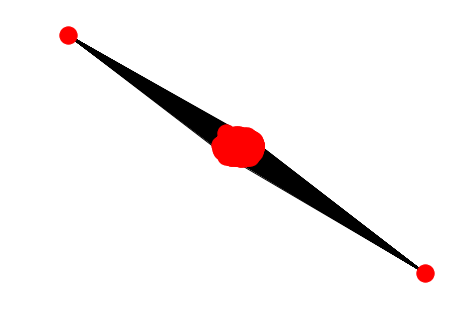

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 